In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from skimage.morphology import binary_opening, disk, label
from skimage.segmentation import mark_boundaries
from PIL import Image

In [2]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return -(2. * intersection + smooth) \
            / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [3]:
GPR_RGB = cv2.imread(r'C:\Radarogram\397_1.jpg')
GPR = cv2.cvtColor(GPR_RGB, cv2.COLOR_BGR2GRAY)
GPR = np.pad(GPR, (0, 32 - len(GPR)%32), 'constant')
    
modelCrack = keras.models.load_model("Cracks32.h5", custom_objects={'dice_coef': dice_coef})

maskCracks = np.zeros(GPR.shape)
count_mask = np.zeros(GPR.shape)

for i in range(0, GPR.shape[0] - 31, 4):
    for j in range(0, GPR.shape[1] - 31, 4):
        cell = np.array([GPR[i:i+32,j:j+32]])
        maskCracks[i:i+32,j:j+32] += modelCrack.predict(cell)[0].reshape(32,32)
        count_mask[i:i+32,j:j+32] += 1
                
maskCracks = np.divide(maskCracks,count_mask)
maskPhase = np.divide(maskPhase,count_mask)

C:\Users\semas\AppData\Local\Temp/ipykernel_11284/2317063278.py:21: RuntimeWarning: invalid value encountered in true_divide
  maskCracks = np.divide(maskCracks,count_mask)
C:\Users\semas\AppData\Local\Temp/ipykernel_11284/2317063278.py:22: RuntimeWarning: invalid value encountered in true_divide
  maskPhase = np.divide(maskPhase,count_mask)


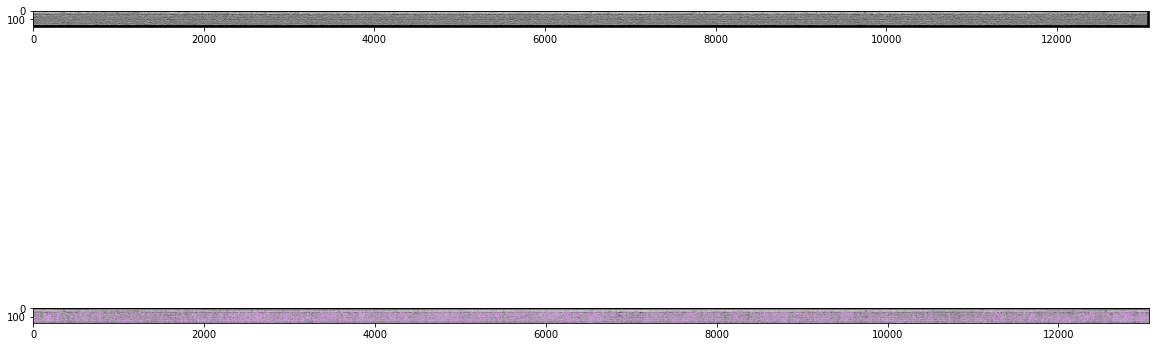

In [7]:
GPR_RGB = cv2.imread(r'C:\Radarogram\397_1.jpg')
for i in range(GPR_RGB.shape[0] - 1):
    for j in range(GPR_RGB.shape[1] - 1):
        if GPR_RGB[i, j, 0] > 25 and GPR_RGB[i, j, 1] > 25 and GPR_RGB[i, j, 2] > 25:
            if maskCracks[i,j] > 0.25:
                if maskCracks[i,j - 1] < 0.25 and maskCracks[i - 1,j] < 0.25 and maskCracks[i - 1,j - 1] < 0.25 and maskCracks[i + 1,j] < 0.25 and maskCracks[i,j + 1] < 0.2 and maskCracks[i + 1,j + 1] < 0.2 and maskCracks[i + 1,j - 1] < 0.2 and maskCracks[i - 1,j + 1] < 0.2:
                    GPR_RGB[i, j] = [255,0,0]

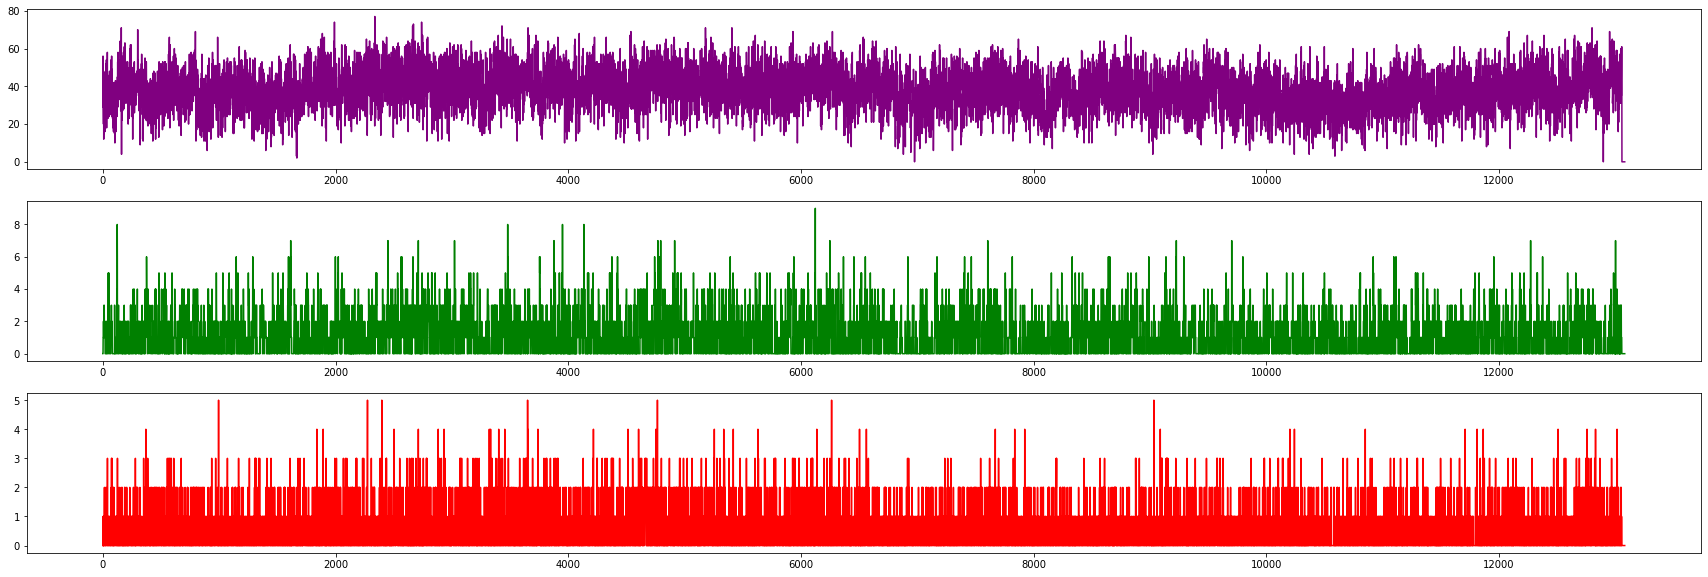

In [8]:
cracksCount = np.zeros(maskCracks.shape[1])
for j in range(GPR_RGB.shape[1]):
    for i in range(GPR_RGB.shape[0]):
        if GPR_RGB[i,j,0] == 255 and GPR_RGB[i,j,1] == 0 and GPR_RGB[i,j,2] == 0:
            cracksCount[j] += 1

np.save('',cracksCount)